# Processamento digital de imagens
Professor Bruno Augusto Dorta Marques

## Atividade 1 

O objetivo desta atividade é implementar operações básicas envolvendo processamento de imagens digitais. 

O conteúdo desta atividade engloba as aulas do [Capítulo 1](https://www.brunodorta.com.br/pdi/config.html) ao [Capítulo 5](https://www.brunodorta.com.br/pdi/reconstruction.html) do livro didático.

A atividade deve seguir algumas regras:
- Não utilize bibliotecas externas que não foram utilizadas durante as aulas. Todo o processamento de imagens deve ser executado em python, utilizando as bibliotecas utilizadas no livro didático.
- Sempre que possível, utilize funções do ``numpy`` para implementar as respostas.
- É permitido a criação de funções e células adicionais para resolver as questões
- Os parâmetros de entrada, e as variáveis de saída devem ser respeitadas e não podem ser alteradas.
- Não altere o nome das funções nas respostas.
- Não entregue a atividade com erros de sintaxe ou de execução. Caso não consiga resolver alguma questão, deixe a questão em branco, retornando ```None``` na devida função.
- Qualquer cópia da internet ou de outras fontes implicará na anulação da questão
- A detecção de plágio nas respostas pode anular toda a atividade.

Dicas:
- Ao final, certifique-se que todas as suas respostas estão sendo executadas corretamente, reinicie o kernel python e execute todas as células sequencialmente do início ao fim.
- Com exceção das imagens de entrada, evite utilizar outras variáveis globais (definidas fora do escopo local da função) para as suas implementações.
- É permitido e aconselhável plotar estágios intermediários das suas respostas, quando elas forem muito complexas. Utilize o plt.imshow, seguido de um plt.show para exibir suas imagens
- Caso a imagem criada esteja muito pequena para ser visualizada, utilize antes da imagem o comando ``plt.figure(figsize=(X,Y))`` onde ``X`` e ``Y`` são os tamanhos mínimos da figura.
- Para plotar imagens em escala de cinzas utilize o comando ``plt.imshow`` com o parâmetro ``cmap="gray"``, por exemplo: ``plt.imshow(imagem, cmap="gray")``
- Para converter entre os formatos ``np.float32`` e ``np.uint8``, utilize a função ``np.array.astype``
- Para copiar uma imagem, utilize a função ``np.copy()``. Isto é particularmente interessante para que você não altere a imagem de entrada.

## Dados Pessoais
Insira os seus dados pessoais logo abaixo.

O trabalho pode ser feito de forma individual ou em duplas.
Caso o trabalho seja feito individualmente, altere apenas o primeiro conjunto de variáveis (``nome_1`` e ``RA_1``).

In [44]:
import numpy as np
import cv2 as cv
import imageio as io
import matplotlib.pyplot as plt

In [45]:
nome_1 = "Matheus Moreira Francisco"
RA_1 = 11201810390

nome_2 = "Melissa Junqueira de Barros Lins"
RA_2 = 11201920583

### Preparando a imagem de entrada:

Carregue uma imagem de sua preferência utilizando o ``io.imread`` e converta para o espaço de cor em escalas de cinzas utilizando ```cv.cvtColor``` com o parâmetro 
``cv.COLOR_RGB2GRAY``.

**A imagem deve ser entregue junto ao ``.ipynb`` no momento de envio da atividade.**

Exemplo:

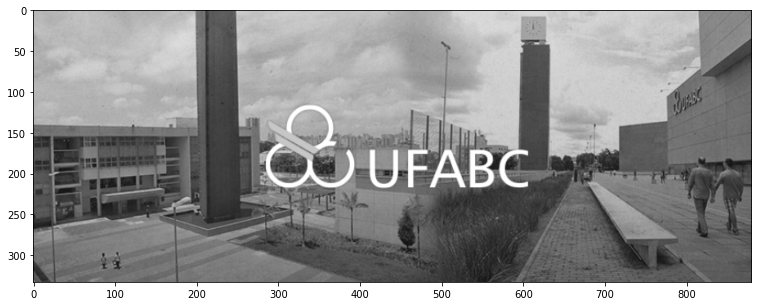

In [46]:
#Exemplo
img = cv.imread('ufabc_gray.png', cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize = (15,5))
plt.imshow(img);

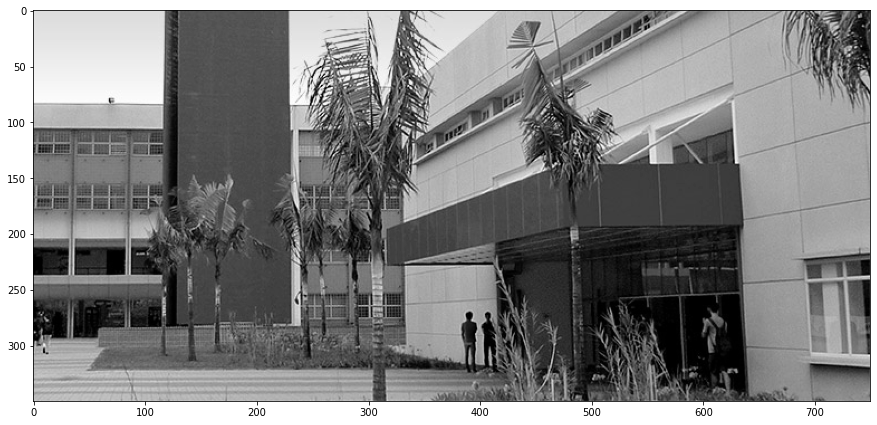

In [47]:
'''Insira o código para leitura (e conversão) da imagem de entrada aqui'''

entrada = io.imread('https://www.ufabc.edu.br/images/imagens_a_ufabc/campus-sbc.jpg')
entrada = cv.cvtColor(entrada, cv.COLOR_RGB2GRAY)
plt.figure(figsize=(15,15))
plt.imshow(entrada, cmap="gray")

## Questão 1 (2.0)

### Implemente uma função para obter o negativo da imagem. 
Implemente a operação sobre a intensidade de uma imagem em escala de cinzas. \
Os valores de intensidades do negativo de uma imagem consiste nos valores complementares as intensidades originais.

**Exemplo:**

o nível de cinza com valor $0$ passa a ser convertido para valor $255$, \
o nível de cinza com valor $1$ passa a ser convertido para valor $254$ e assim por diante.

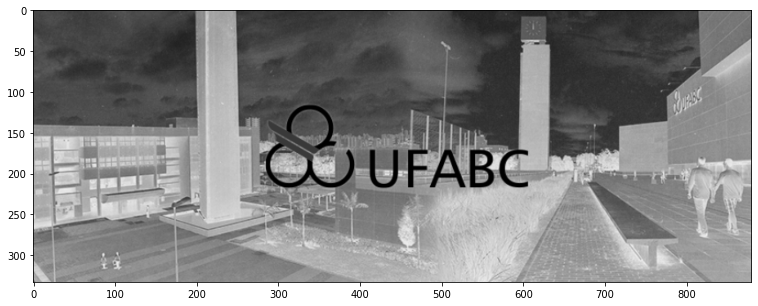

In [48]:
#Exemplo
img = cv.imread('q1_negativo.png', cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize = (15,5))
plt.imshow(img);

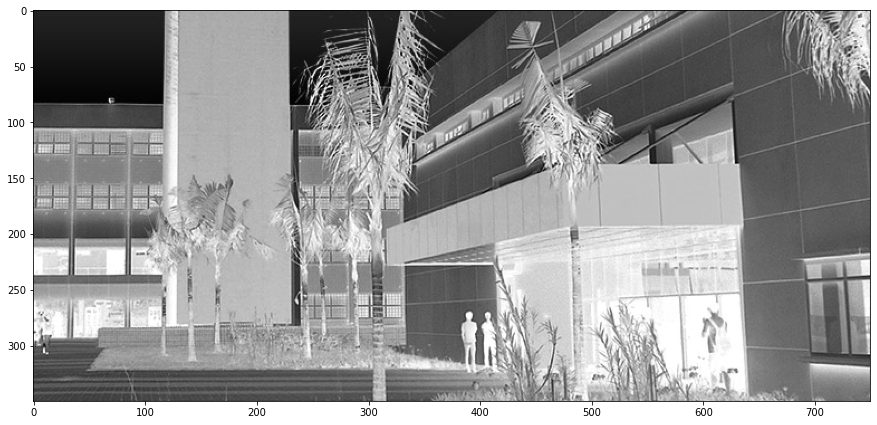

In [49]:
def q1_negativo(imagem):
  
    resultado = None

    '''Implemente seu código aqui'''
    # Conta para se obter o complementar das intensidades originais
    resultado = 255 - imagem
    
    return resultado

# Chamando a função
negativo = q1_negativo(entrada)

#Imprimindo a imagem
plt.figure(figsize=(15,15))
plt.imshow(negativo, cmap="gray")

Utilize este espaço para escrever comentários sobre a sua resposta.

## Questão 2 (2.0)
### Implemente uma função para converter o intervalo de intensidades da imagem para o **intervalo dinâmico** $[127; 191]$

**Exemplo:** 

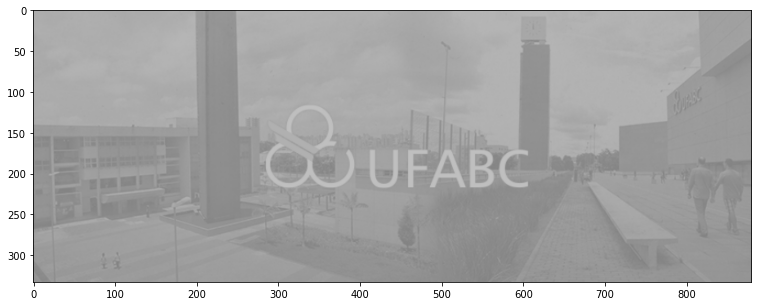

In [50]:
#Exemplo
img = cv.imread('q2_intervalo.png', cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize = (15,5))
plt.imshow(img);

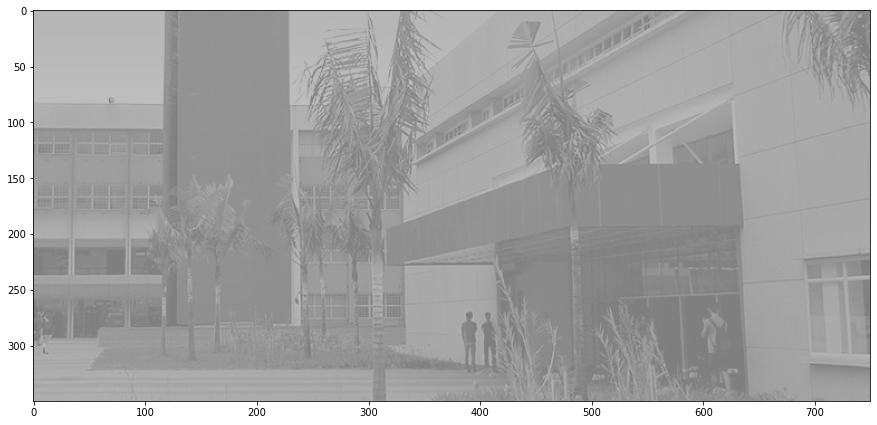

In [51]:
def q2_intervalo(imagem, intervalo=(127,191)):

    resultado = None
    
    '''Implemente seu código aqui'''
    # Conta para converter o intervalo de intensidades 
    imagem = (imagem *(64/256)) + 127
    imagem = imagem.astype(int)
    resultado = imagem

    return resultado

# Chamando a função
intervalo = q2_intervalo(entrada)

#Imprimindo a imagem
plt.figure(figsize=(15,15))
plt.imshow(intervalo, cmap="gray", vmin=0, vmax=255)

Utilize este espaço para escrever comentários sobre a sua resposta.

## Questão 3 (2.0)
### Implemente uma função para inverter espacialmente (entrelaçar) os valores dos pixels das linhas **impares** da imagem.

Considere a primeira linha como linha $0$. \
Considere a linha $0$ como *par*. 

**Exemplo:**


os valores dos pixels da linha $0$ serão posicionados da esquerda para a direita; \
os valores dos pixels da linha $1$ serão posicionados da direita para a esquerda; \
os valores dos pixels da linha $2$ serão posicionados da esquerda para a direita; \
e assim por diante.

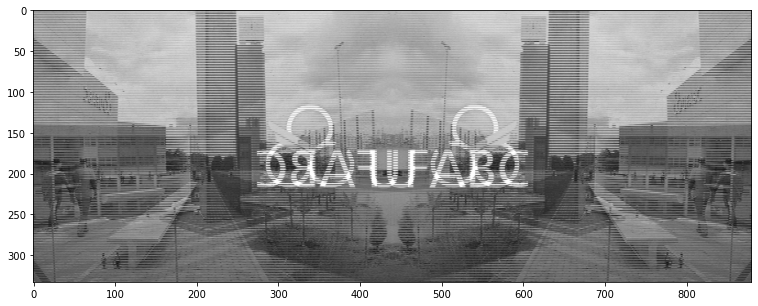

In [52]:
#Exemplo
img = cv.imread('q3_invert.png', cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize = (15,5))
plt.imshow(img);

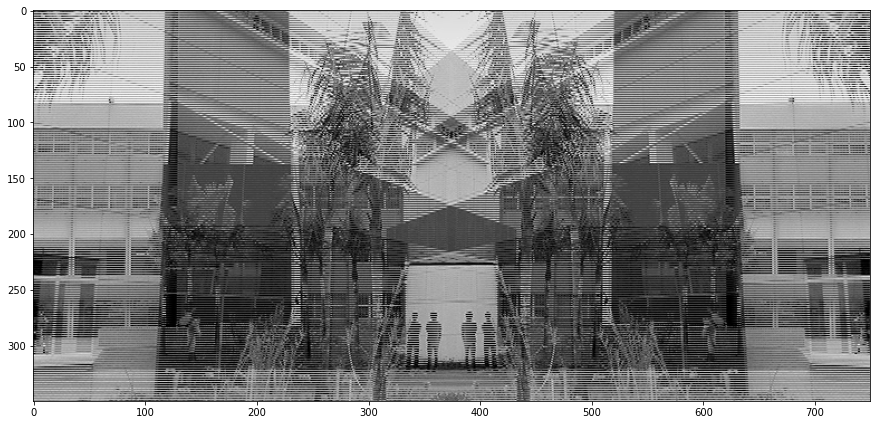

In [53]:
def q3_inverter(imagem, modo="impar"):
    
    resultado = None
    
    '''Implemente seu código aqui'''
    # Fazendo uma cópia da imagem
    resultado = imagem.copy()

    # Iterando em cima da altura da imagem
    for i in range(0, imagem.shape[0]):
      # Conferindo se as linhas são ímpares
      if (i % 2 != 0):
        #Invertendo os valores dos pixels das linhas
        resultado[i] = resultado[i][::-1]
    
    return resultado

# Chamando a função
invertido = q3_inverter(entrada)

#Imprimindo a imagem
plt.figure(figsize=(15,15))
plt.imshow(invertido, cmap="gray")

Utilize este espaço para escrever comentários sobre a sua resposta.

## Questão 4 (2.0)
### Implemente uma função que faça a reflexão de linhas e colunas. Primeiro faça o espelhamento das linhas da parte superior para a parte inferior da imagem. Em seguida, faça o espelhamento das colunas da parte esquerda na parte direita da imagem.


Faça primeiro a operação nas linhas. Utilizando o resultado das linhas, faça a operação nas colunas.

Sempre quando houve algum arredondamento, faça o arredondamento para baixo. \
Por exemplo, $201 / 2 = 100$. Para facilitar, você pode utilizar a divisão inteira no python ```201//2```


Teste seu algoritmo para imagens com resolução espacial *par* e *impar*.


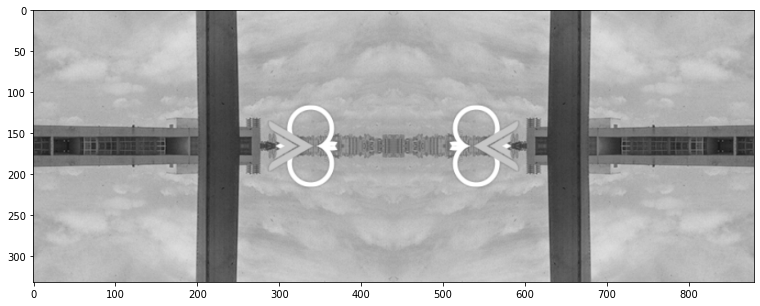

In [54]:
#Exemplo
img = cv.imread('q4_mirror.png', cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize = (15,5))
plt.imshow(img);

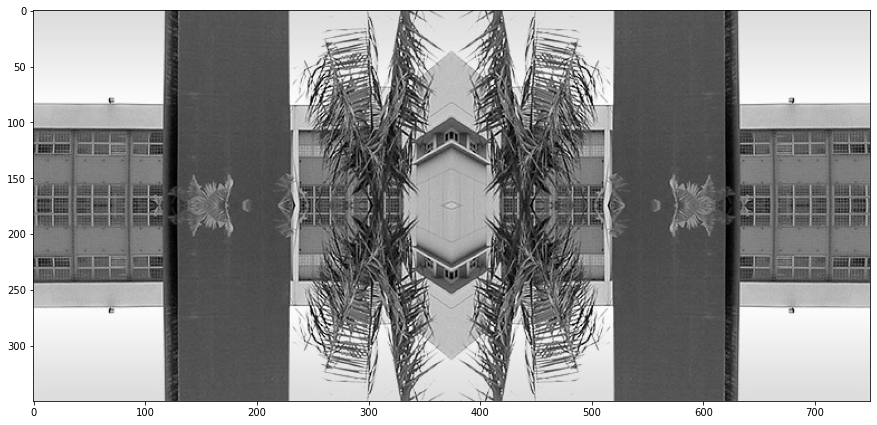

In [55]:
def q4_espelhar(imagem):
    
    resultado = None

    '''Implemente seu código aqui'''
    # Criando a imagem inicial
    resultado = np.zeros((imagem.shape[0], imagem.shape[1]), dtype=np.uint)

    # Cortando a imagem em relação às linhas
    imagem_cortada = imagem[:(imagem.shape[0]//2), :]

    # Invertendo a imagem anterior
    imagem_cortada_invertida = imagem_cortada[::-1]

    # Cortando a imagem em relação às colunas
    coluna_refletida = resultado[:, :imagem.shape[1]//2]

    #Invertendo a imagem anterior
    coluna_refletida_invertida = coluna_refletida[::,::-1]

    #Inserindo as imagens na matriz inicial
    resultado[:(imagem.shape[0]//2),] = imagem_cortada
    resultado[(imagem.shape[0]//2):,:] = imagem_cortada_invertida
    resultado[:, imagem.shape[1]//2:] = coluna_refletida_invertida

    return resultado

# Chamando a função
espelho = q4_espelhar(entrada)

#Imprimindo a imagem
plt.figure(figsize=(15,15))
plt.imshow(espelho, cmap='gray')

Utilize este espaço para escrever comentários sobre a sua resposta.

## Questão 5 (2.0)
### Implemente uma função que faça um mosaico a partir de uma imagem.

O mosaico deve seguir o esquema de blocos, supondo que cada bloco esteja identificado como abaixo:


|  **0** |  **1** |  **2** |  **3** |  **4** |
|:------:|:------:|:------:|:------:|:------:|
|  **5** |  **6** |  **7** |  **8** | **9** | 
| **10** | **11** | **12** | **13** | **14** |
| **15** | **16** | **17** | **18** | **19** |

a nova configuração deve respeitar a seguinte numeração dos blocos:

|  **3** |  **2** |  **12** |  **0** |  **4** |
|:------:|:------:|:------:|:------:|:------:|
| **5** | **17** |  **7** |  **8** | **15** | 
| **16** |  **11** |  **1** | **19** | **18** |
|  **9** | **6** |  **10** | **14** | **13** |


Caso a resolução da sua imagem não seja múltipla da quantidade de blocos, você pode cortar ou redimensionar a sua imagem antes de executar o algoritmo.

**Exemplo:**

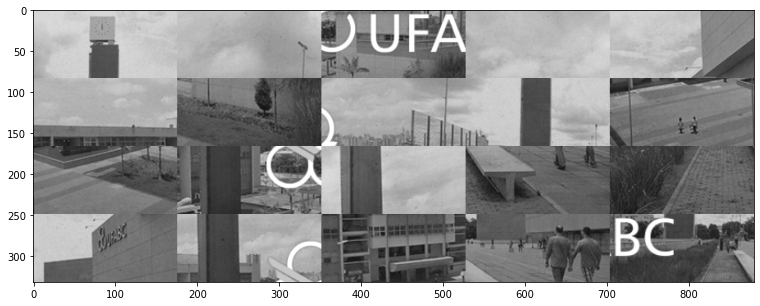

In [56]:
#Exemplo
img = cv.imread('q5_mosaic.png', cv.IMREAD_COLOR) 
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize = (15,5))
plt.imshow(img);

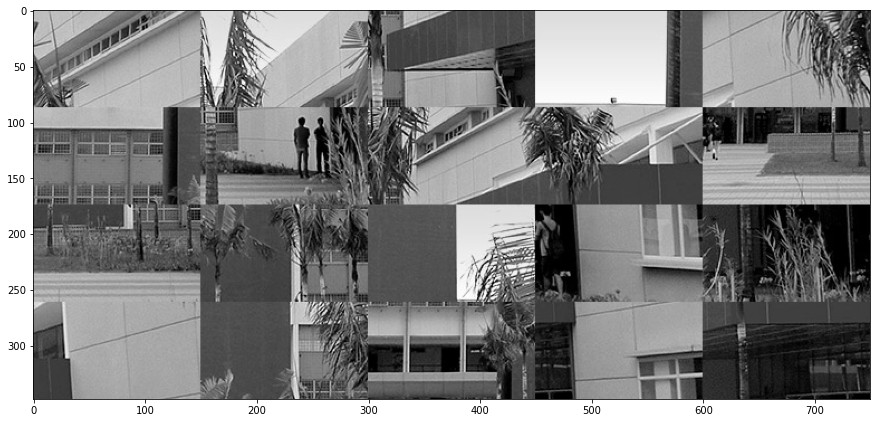

In [57]:
def q5_mosaico(imagem, num_linhas=4, num_cols=5):
    
    resultado = None

    '''Implemente seu código aqui'''
    # Definindo a ordem do mosaico
    ordem = np.array([[3,2,12,0,4],
                      [5,17,7,8,15],
                      [16,11,1,19,18],
                      [9,6,10,14,13]])


    #Descobrindo a largura e altura do mosaico
    largura = imagem.shape[0] // ordem.shape[0]
    altura = imagem.shape[1] // ordem.shape[1]

    #Nova forma para o array
    ordem = ordem.reshape(-1)
    linhas = []

    # Iterando o mosaico
    mosaico = [imagem[i // 5 * largura : (i // 5 + 1) * largura, i % 5 * altura : (i % 5 + 1) * altura] for i in ordem]
    resultado = np.array(mosaico)

    #Empilhando horizontal e verticalmente
    linhas = [np.hstack(resultado[i*5: (i + 1)*5]) for i in range (len(resultado) // 5)]
    resultado = np.vstack(np.array(linhas))

    return resultado
    
# Chamando a função
mosaico = q5_mosaico(entrada)

#Imprimindo a imagem
plt.figure(figsize=(15,15))
plt.imshow(mosaico, cmap="gray")

Utilize este espaço para escrever comentários sobre a sua resposta.